# Things to do!

+ Add a layer activation argument to L_layer_model fucntion and propagate that feature to functions in it. This activation argument is a list of size of number of layers. Eg. ["relu", "relu", "'sigmoid"].

+ Train and Test model with different activation functions.
+ ok


# Package imports

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Dataset Init

In [3]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

# Generate random permutation of the dataset
idx = np.random.permutation(X.shape[0])
X, Y = X[idx], Y[idx]

#Normalize the dataset
X = X.T
X = (X-np.mean(X, axis=1, keepdims = True))/(np.max(X, axis=1, keepdims = True)-np.min(X, axis = 1, keepdims = True))
print(X.shape)

(30, 569)


In [4]:
shape_X = X.shape
Y = Y.reshape(1,Y.shape[0])
shape_Y = Y.shape
m = X.shape[1]  # training set size

# Type: numpy array, validate using function type(X), type(Y)
print ('The shape of X(Features) is: ' + str(shape_X))
print ('The shape of Y(Target values) is: ' + str(shape_Y))
print ('Number of training examples:', m)

The shape of X(Features) is: (30, 569)
The shape of Y(Target values) is: (1, 569)
Number of training examples: 569


# 2-layer Neural Network

## Developing Neural Network

### Initialization

In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

### Forward Propagation

#### Activation Functions

In [0]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def tanh(Z):
    """
    Implements the tanh activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of tanh(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    cache = Z
    
    return A, cache
  
def relu_backward(dA, Z):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, Z):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ
  
def tanh_backward(dA, Z):
    """
    Implement the backward propagation for a single TANH unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    s = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    dZ = dA * (1 - s * s)

    assert (dZ.shape == Z.shape)

    return dZ

#### Linear Forward

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part (W.X + b) of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

#### Linear Activation Forward

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

#### L-Layer Forward Propagation

In [0]:
def L_model_forward(X, parameters, activation_functions):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2 #number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = activation_functions[l-1])
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = activation_functions[L-1])
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

#### Cost Function

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost =  (-1./m) * np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

### Backward Propagation

#### Linear Backward

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1./m)*np.dot(dZ, A_prev.T)
    db = (1./m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

#### Linear Activation Backward

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#### L-Layer Backward Propagation

In [0]:
def L_model_backward(AL, Y, caches, activation_functions):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients.
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = activation_functions[L-1])
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = activation_functions[l])
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

#### Update Parameters

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l + 1)]
        
    return parameters

## Neural Network Model

In [0]:
def L_layer_model(X, Y, layers_dims, activation_functions, learning_rate = 0.1, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (features, number of examples)
    Y -- vector of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    activation_function = "relu"
    #activation_functions.insert(0, activation_function)
    # gradient descent
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #activation function for first L-1 layers, last layer would always have sigmoid
        AL, caches = L_model_forward(X, parameters,activation_functions)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches, activation_functions)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i+100, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

# Training

Cost after iteration 100: 0.693148
Cost after iteration 200: 0.660566
Cost after iteration 300: 0.660312
Cost after iteration 400: 0.660304
Cost after iteration 500: 0.660297
Cost after iteration 600: 0.660285
Cost after iteration 700: 0.660267
Cost after iteration 800: 0.660236
Cost after iteration 900: 0.660175
Cost after iteration 1000: 0.660039
Cost after iteration 1100: 0.659671
Cost after iteration 1200: 0.658255
Cost after iteration 1300: 0.646988
Cost after iteration 1400: 0.362383
Cost after iteration 1500: 0.134166
Cost after iteration 1600: 0.095446
Cost after iteration 1700: 0.081343
Cost after iteration 1800: 0.074547
Cost after iteration 1900: 0.070521
Cost after iteration 2000: 0.067708
Cost after iteration 2100: 0.065506
Cost after iteration 2200: 0.063646
Cost after iteration 2300: 0.061999
Cost after iteration 2400: 0.060496
Cost after iteration 2500: 0.059099
Cost after iteration 2600: 0.057793
Cost after iteration 2700: 0.056573
Cost after iteration 2800: 0.055439
C

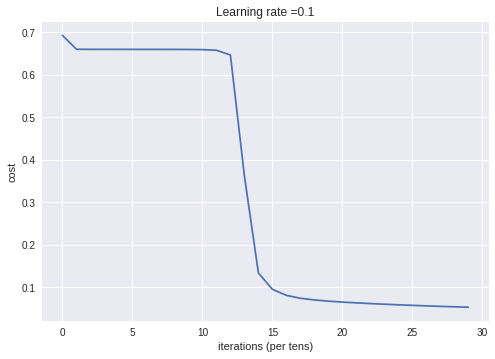

In [18]:
#Dimensions of each layer in our network
layer_dims = [X.shape[0],20,10,Y.shape[0]]
activation_functions = ["tanh","tanh","sigmoid"]
alpha = 0.1
parameters = L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000, print_cost=True)

# Predictions and Accuracy

In [0]:
def predict(parameters, X, activation_functions):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- data, numpy array of shape (features, number of examples)    
    
    Returns
    predictions -- vector of predictions of our model
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    AL, caches = L_model_forward(X,parameters,activation_functions)
    predictions = 1 * (AL > 0.5)
    
    return predictions

In [21]:
activations = ["relu","relu","sigmoid"]
predictions = predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


In [22]:
activations = ["relu","relu","relu"]
predictions = predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 67%


In [25]:
activations = ["tanh","tanh","sigmoid"]
predictions = predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


In [24]:
activations = ["relu","tanh","sigmoid"]
predictions = predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%
